In [101]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import os

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [58]:
data_base_dir = "../data"
file_name = "Invistico_Airline.csv"
data_path= os.path.join(data_base_dir, file_name)

In [59]:
pd.set_option('display.max_columns', None)
df = pd.read_csv(data_path)
df.head(5)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [60]:
df.shape

(129880, 23)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [62]:
df.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [63]:

before = df.copy()

In [64]:
# Remplacer les valeurs manquantes par la moyenne
# df["Arrival Delay in Minutes"] = df["Arrival Delay in Minutes"]. \
#     fillna(round(df["Arrival Delay in Minutes"].mean(), 2))

# Remplacer les valeurs manquantes par les valeurs précédentes, si un train arrives en retard alors probablement le suivant aussi sera en retard
df["Arrival Delay in Minutes"] = df["Arrival Delay in Minutes"].bfill()

In [65]:
def clean_data(df):
    # Remplacer les valeurs manquantes par la valeur précédente
    df["Arrival Delay in Minutes"] = df["Arrival Delay in Minutes"].bfill()

    # Renommer les colonnes en français
    colonnes_fr = [
    'satisfaction',
    'genre',
    'type_client',
    'age',
    'type_voyage',
    'classe',
    'distance_vol',
    'confort_siege',
    'horaire_dep_arr',
    'repas_boisson',
    'emplacement_porte',
    'wifi_vol',
    'divertissement_vol',
    'support_en_ligne',
    'facilité_reservation',
    'service_bord',
    'espace_jambes',
    'gestion_bagages',
    'service_enregistrement',
    'propreté',
    'embarquement_en_ligne',
    'retard_depart_min',
    'retard_arrivée_min']
    df.columns = colonnes_fr

    # Encodage manuel des colonnes catégorielles
    df["satisfaction"] = df["satisfaction"].apply(lambda x: 1 if x =='satisfied' else 0)
    df["genre"] = df["genre"].apply(lambda x: 1 if x == 'Male' else 0)
    df["type_client"] = df["type_client"].apply(lambda x: 1 if x == 'Loyal Customer' else 0)
    df["type_voyage"]= df["type_voyage"].apply(lambda x: 1 if x == 'Personal Travel' else 0)
    df["classe"] = df["classe"].map({
        'Eco': 1,
        'Business': 2,
        'Eco Plus': 3
    })

    return df

In [66]:
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [67]:
# Renommer les colonnes
colonnes_fr = [
    'satisfaction',
    'genre',
    'type_client',
    'age',
    'type_voyage',
    'classe',
    'distance_vol',
    'confort_siege',
    'horaire_dep_arr',
    'repas_boisson',
    'emplacement_porte',
    'wifi_vol',
    'divertissement_vol',
    'support_en_ligne',
    'facilité_reservation',
    'service_bord',
    'espace_jambes',
    'gestion_bagages',
    'service_enregistrement',
    'propreté',
    'embarquement_en_ligne',
    'retard_depart_min',
    'retard_arrivée_min'
]
df.columns = colonnes_fr

In [68]:
df["satisfaction"].unique()
df["genre"].unique()
df["type_client"].unique()
df["type_voyage"].unique()
df["classe"].unique()

# des map pour colonne classe avec catégories > 3
mapping_classe = {
    'Eco': 1,
    'Business': 2,
    'Eco Plus': 3
}

In [69]:
# encodage des colonnes catégorielles
df["satisfaction"] = df["satisfaction"].apply(lambda x: 1 if x =='satisfied' else 0)
df["genre"] = df["genre"].apply(lambda x: 1 if x == 'Male' else 0)
df["type_client"] = df["type_client"].apply(lambda x: 1 if x == 'Loyal Customer' else 0)
df["type_voyage"]= df["type_voyage"].apply(lambda x: 1 if x == 'Personal Travel' else 0)
df["classe"] = df["classe"].map({
    'Eco': 1,
    'Business': 2,
    'Eco Plus': 3
})

satisfaction
1    0.547328
0    0.452672
Name: count, dtype: float64

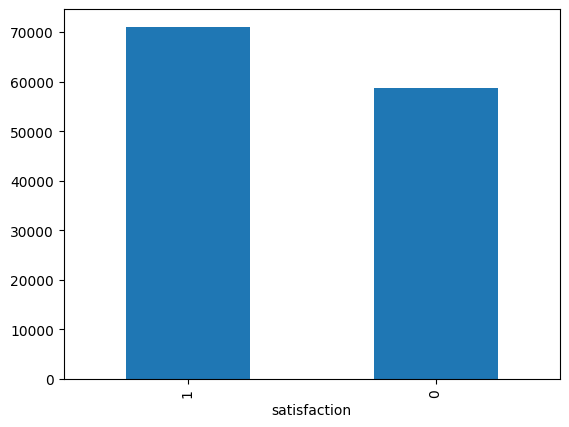

In [70]:
# Analyse exploratoire

df.satisfaction.value_counts().plot(kind="bar")
df.satisfaction.value_counts()/df.shape[0]

La répartition des clients selon leur niveau de satisfaction est relativement équilibrée, avec 54,73 % de clients satisfaits et 45,27 % de clients insatisfaits.

genre
0    0.507384
1    0.492616
Name: count, dtype: float64

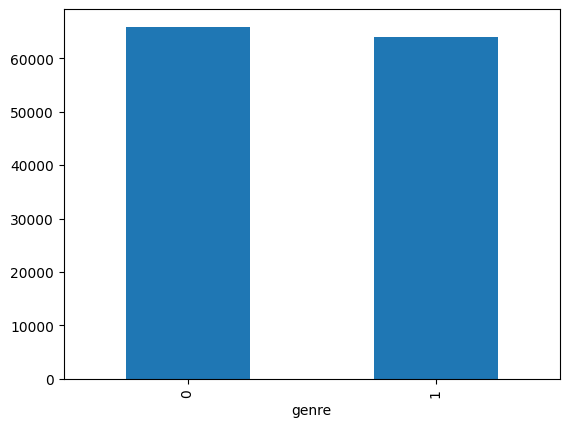

In [72]:
df.genre.value_counts().plot(kind="bar")
df.genre.value_counts()/df.shape[0]

La composition par genre de la clientèle présente une répartition relativement équilibrée, avec 50,74 % de clientes et 
49,26 % de clients.

type_client
1    0.816908
0    0.183092
Name: count, dtype: float64

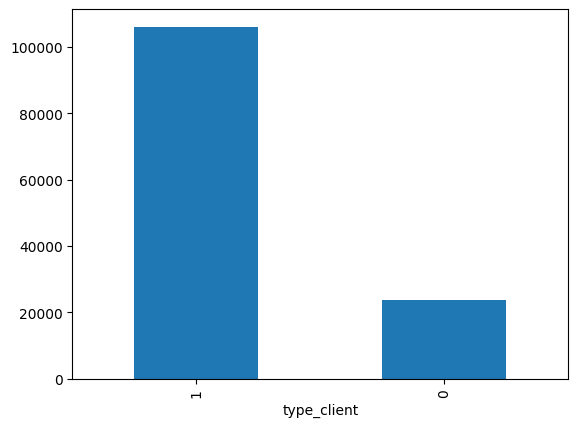

In [73]:
df.type_client.value_counts().plot(kind="bar")
df.type_client.value_counts()/df.shape[0]
# (df.type_client.value_counts()/df.shape[0])[1] /(df.type_client.value_counts()/df.shape[0])[0]


 Il existe une forte disparité entre le nombre de clients fidèles et celui des clients non fidèles. On compte 4,61 fois plus de clients fidèles que de clients non fidèles, soit 81,7 % de clients fidèles contre 18,3 % de clients non fidèles.
 
 Cette prédominance des clients fidèles peut traduire une bonne satisfaction générale, mais elle souligne également un déséquilibre à prendre en compte lors de l'entraînement des modèles prédictifs, notamment pour éviter un biais en faveur de la classe majoritaire.

In [74]:
df.age.describe()

count    129880.000000
mean         39.427957
std          15.119360
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: age, dtype: float64

L’âge moyen des voyageurs est de 39,43 ans, avec un écart-type de 15,11 ans, indiquant une grande dispersion autour de la moyenne. Les âges s’étendent de 7 à 85 ans, mais la majorité des passagers se situe entre 27 et 51 ans (entre le 1er et le 3e quartile).
La médiane est de 40 ans, très proche de la moyenne, ce qui suggère une distribution quasi symétrique, bien que légèrement asymétrique à gauche.
Un boxplot permettrait de visualiser cette dispersion, d’identifier d’éventuels outliers, et de mieux comprendre la répartition des âges.

<Axes: >

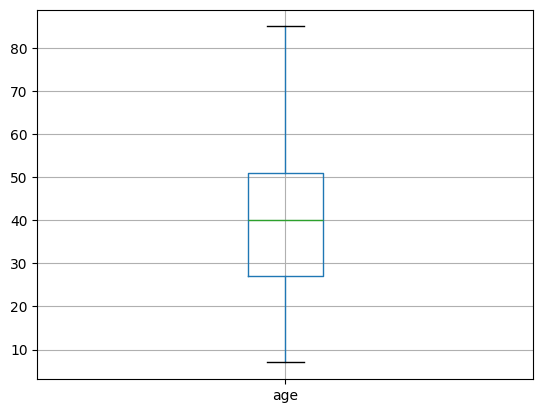

In [75]:
df.boxplot(column="age")

In [78]:
# Diviser le dataframe

X = df.drop(["satisfaction"], axis=1 )
y = df["satisfaction"]

In [82]:
# diver en données d'entrainement et de test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [87]:
# Normaliser les données
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [93]:
# Entrainer le modèle

lr = LogisticRegression()
modele = lr.fit(X_train_scaled, y_train)

In [98]:
# Evaluer le modele

y_pred = modele.predict(X_test_scaled)

score = accuracy_score(y_test, y_pred)
score_matrice = confusion_matrix(y_test, y_pred)

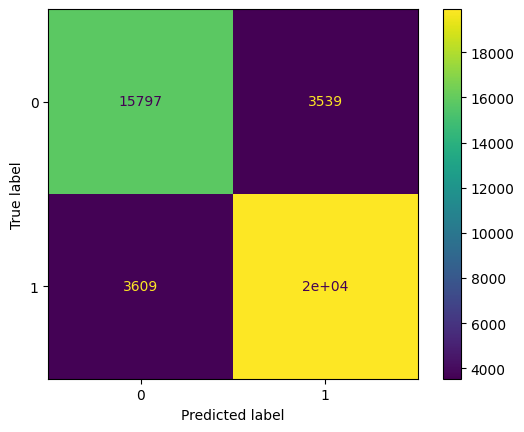

In [105]:
cm_display = ConfusionMatrixDisplay(score_matrice, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [99]:
score

0.8332283427824829

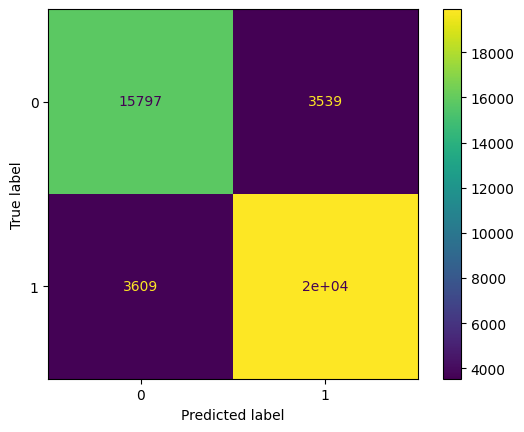

In [106]:
ConfusionMatrixDisplay.from_estimator(
    modele, X_test_scaled, y_test)